# Create a model that can classify Digits and separate other random input from the user

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

np.random.seed(25)

In [23]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from tensorflow.keras.layers import LeakyReLU 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, 'Class 7')

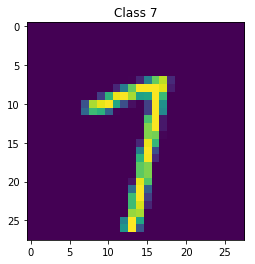

In [53]:
plt.imshow(X_train[42])
plt.title('Class '+ str(y_train[42]))

## Create a new "NOT digit" class

In [54]:
## Import letters from EMNIST
import idx2numpy

# Reading
ndarr = idx2numpy.convert_from_file('/home/rimogardino/Programs/ML/Data/emnist-letters-train-images-idx3-ubyte')

print(ndarr.shape)
p = np.random.permutation(ndarr.shape[0])
ndarr = ndarr[p]

(124800, 28, 28)


## Append some of the letter data to the NOT digit class

Text(0.5, 1.0, 'Class 10')

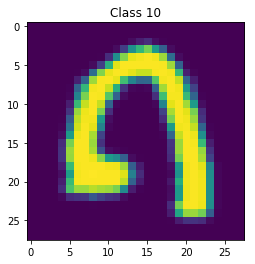

In [55]:
n_letter_exmpls = 2000

new_examples = ndarr[:n_letter_exmpls]
new_labels = ['10' for lb in range(0,n_letter_exmpls)]

X_train = np.append(X_train, new_examples, axis=0)
y_train = np.append(y_train, new_labels, axis=0)


plt.imshow(X_train[X_train.shape[0]-10])
plt.title('Class '+ str(y_train[X_train.shape[0]-10]))

## Create some noisy examples for the NOT digit class

shape before
(64000, 28, 28)
(64000,)

shape after
(68000, 28, 28)
(68000,)


Text(0.5, 1.0, 'Class 10')

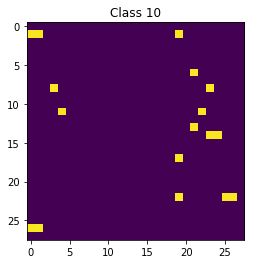

In [51]:
import random
print("shape before")
print(X_train.shape)
print(y_train.shape)

## total not digit examples
tot_nd_exmp = 6000

## left over space to fill
n_new_exmpls = tot_nd_exmp - n_letter_exmpls

new_examples = []
new_labels = ['10' for lb in range(0,n_new_exmpls)]

for n in range(0,n_new_exmpls):
    new_example = []
    for ri in range(0,28):
        new_row = []
        for ci in range(0,28):
            value = random.random()
            ## Increase the likelyhood of having lines
            if ci > 0 and new_row[ci-1] != 0 and random.random() > 0.85:
                value = 0.99
            value = (int(value * 255) + 1) if (value > 0.985) else 0
            new_row.append(value)
        new_example.append(new_row)
    new_examples.append(new_example)

X_train = np.append(X_train, new_examples, axis=0)
y_train = np.append(y_train, new_labels, axis=0)

print("\nshape after")
print(X_train.shape)
print(y_train.shape)

plt.imshow(X_train[X_train.shape[0]-10])
plt.title('Class '+ str(y_train[X_train.shape[0]-10]))

## Shuffle the data again

In [28]:
def unison_shuffled_copies(a, b):
    assert a.shape[0] == b.shape[0]
    p = np.random.permutation(a.shape[0])
    return a[p], b[p]

print(y_train[60999])

X_train, y_train = unison_shuffled_copies(X_train, y_train)

print(y_train[60999])

10
6


## Normalize

In [29]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

print(X_train.shape)
print(X_train[5].max())

(66000, 28, 28, 1)
1.0


In [30]:
number_of_classes = 11

Y_train = to_categorical(y_train, number_of_classes)
Y_test = to_categorical(y_test, number_of_classes)

y_train[60999], Y_train[60999], Y_train[60999].shape 

('6',
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 (11,))

## Data Generators

In [31]:
## Add some variation in the examples with rotations and shifts and stuff
batch_size = 64

## Train generations
gen = ImageDataGenerator(rotation_range=8,
                         width_shift_range=0.08,
                         shear_range=0.3,
                         height_shift_range=0.08,
                         zoom_range=0.08)
train_generator = gen.flow(X_train, Y_train, batch_size=batch_size)


## Test generations
test_gen = ImageDataGenerator()
test_generator = test_gen.flow(X_test, Y_test, batch_size=batch_size)

## Model building

In [32]:
model = Sequential()

model.add(Conv2D(32, (3, 3),
                 input_shape=(28,28,1),
                 activation="relu"))
BatchNormalization(axis=-1)


model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
BatchNormalization(axis=-1)


model.add(Conv2D(64,(3, 3), activation="relu"))
BatchNormalization(axis=-1)

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer for classifaction
BatchNormalization()
model.add(Dense(512, activation="relu"))

BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(11, activation="softmax"))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

In [34]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [36]:
## Train model
n_train_examples = X_train.shape[0]

history = model.fit_generator(train_generator,
                              steps_per_epoch=(n_train_examples)//batch_size,
                              epochs=5,
                              validation_data=test_generator,
                              validation_steps=(n_train_examples)//batch_size
                             )

Epoch 1/5
1031/1031 [==============================] - 30s 30ms/step - loss: 0.2365 - accuracy: 0.9267 - val_loss: 0.0320 - val_accuracy: 0.9899
Epoch 2/5
1031/1031 [==============================] - 33s 32ms/step - loss: 0.0843 - accuracy: 0.9734 - val_loss: 0.0372 - val_accuracy: 0.9881
Epoch 3/5
1031/1031 [==============================] - 29s 28ms/step - loss: 0.0639 - accuracy: 0.9797 - val_loss: 0.0229 - val_accuracy: 0.9932
Epoch 4/5
1031/1031 [==============================] - 29s 28ms/step - loss: 0.0549 - accuracy: 0.9826 - val_loss: 0.0219 - val_accuracy: 0.9934
Epoch 5/5
1031/1031 [==============================] - 29s 28ms/step - loss: 0.0481 - accuracy: 0.9855 - val_loss: 0.0189 - val_accuracy: 0.9947


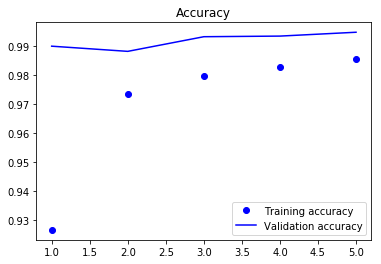

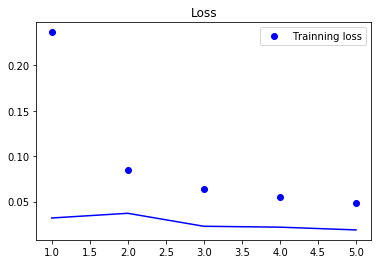

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label="Trainning loss")
plt.plot(epochs, val_loss, "b", Label="Validation loss")
plt.title("Loss")
plt.legend()

plt.show()

In [38]:
score = model.evaluate(X_test, Y_test)

print('Test accuracy: ', score[1])

10000/10000 [==============================] - 1s 90us/sample - loss: 0.0186 - accuracy: 0.9947
Test accuracy:  0.9947


In [20]:
quantize = 1
pruned = 0
if pruned:
    stripped_pruned_model = sparsity.strip_pruning(model)
    stripped_pruned_model.summary()
    final_model = stripped_pruned_model
else:
    final_model = model

converter = tf.lite.TFLiteConverter.from_keras_model(final_model)

if quantize:
    #converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
    converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
    file_name = "mnist_plus_NotDigitClass_quantized"
elif pruned:
    file_name = "mnist_plus_NotDigitClass_pruned"
else:
    file_name = "mnist_plus_NotDigitClass"
    
    
tflite_model = converter.convert()

open("Models_tflite/" + file_name + ".tflite", "wb").write(tflite_model)

601672

## Used for debuging

(18, 28, 1)
(18, 28)


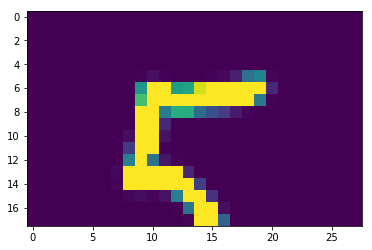

In [44]:
## this was taken from the app
testinput = [[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.007843138], [0.039215688], [0.007843138], [0.0], [0.0], [0.0], [0.007843138], [0.023529412], [0.08627451], [0.37254903], [0.4509804], [0.015686275], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.5254902], [1.0], [1.0], [0.5568628], [0.58431375], [0.9372549], [1.0], [1.0], [1.0], [1.0], [1.0], [0.10980392], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.7058824], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.39607844], [0.007843138], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.003921569], [1.0], [1.0], [0.41960785], [0.62352943], [0.61960787], [0.3529412], [0.24313726], [0.18039216], [0.07058824], [0.015686275], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.003921569], [1.0], [1.0], [0.10980392], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.03529412], [1.0], [1.0], [0.043137256], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.16862746], [1.0], [1.0], [0.007843138], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.44313726], [1.0], [0.3764706], [0.05882353], [0.007843138], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.019607844], [1.0], [1.0], [1.0], [1.0], [1.0], [0.101960786], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.015686275], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.18431373], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.011764706], [0.03137255], [0.011764706], [0.047058824], [0.42745098], [1.0], [1.0], [0.14509805], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.007843138], [0.3882353], [1.0], [1.0], [0.03529412], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.015686275], [1.0], [1.0], [0.31764707], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]]
testinput = np.array(testinput)
print(testinput.shape)
testinput = testinput.reshape( 18, 28)
print(testinput.shape)
plt.imshow(testinput)

In [45]:
## outputs a value from the data in a Kotlin format to input in the app
## to help in debugging
print(Y_test[54].tolist())
#print(X_test[5][0].tolist())
test_string = "arrayOf(arrayOf("
for x in X_test[54]:
    test_string = test_string + "arrayOf("
    for i,y in enumerate(x):
        test_string = test_string + "floatArrayOf(" + str(y[0]) + "f)"
        if i != 27:
            test_string = test_string + ", "
    test_string = test_string + "), "
test_string = test_string + "))"
open("Models_tflite/testvalues.txt", "wb").write(test_string.encode())
print(test_string)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
arrayOf(arrayOf(arrayOf(floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f)), arrayOf(floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayOf(0.0f), floatArrayO